In [1]:
import investpy

search_results = investpy.search_quotes(text='yar',
                                        products=['stocks'],
                                        countries=['norway'],                                        
                                        n_results=10)
a=search_results[0].retrieve_historical_data(from_date='01/01/2021', to_date='18/03/2021')


{'pairId': 381, 'name': 'Yara International ASA', 'flag': 'Norway', 'link': '/equities/yara-internat', 'symbol': 'YAR', 'type': 'Stock - Oslo', 'pair_type_raw': 'Equities', 'pair_type': 'equities', 'countryID': 60, 'sector': 7, 'region': 6, 'industry': 9, 'isCrypto': False, 'exchange': 'Oslo', 'exchangeID': 8}
{'pairId': 33380, 'name': 'Yara International ASA', 'flag': 'Norway', 'link': '/equities/yara-internat?cid=33380', 'symbol': 'YARo', 'type': 'Stock - BATS Europe', 'pair_type_raw': 'Equities', 'pair_type': 'equities', 'countryID': 60, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'BATS Europe', 'exchangeID': 121}


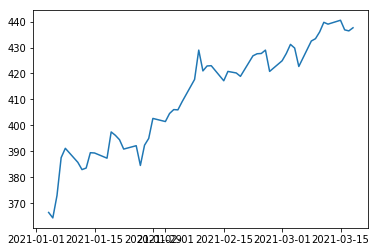

In [3]:
import matplotlib.pyplot as plt
plt.plot(a['High'])
plt.show()

In [19]:
import pandas as pd
p=[('Klp Aksjeglobal Mer Samfunnsansvar', 176,1,'funds','norway'),
    ('Microsoft Corporation',97,8.5,'stocks','united states'),
    ('odin norge c',12,1,'funds','norway'),
    ('odin norden c',9.43,8.5,'funds','norway'),
    ('yar',30,1,'stocks','norway'),
    ('eqnr',50,1,'stocks','norway'),
    ('Schlumberger NV',353,8.5,'stocks','united states')
]
sm = None
highs = None
cm = pd.DataFrame()
for t in p:
    search_results = investpy.search_quotes(text=t[0],
                                        products=[t[3]],
                                        countries=[t[4]],                                        
                                        n_results=10)
    a=search_results[0].retrieve_historical_data(from_date='01/03/2020', to_date='07/04/2021')    
    ser = a['High']*t[2]*t[1]         
    cm[t[0]] = ser
    if sm is None: 
        sm = ser        
        highs = ser
    else:
        sm = sm + ser
        highs.append(ser)
        


{'pairId': 1166631, 'name': 'Klp Aksjeglobal Mer Samfunnsansvar', 'flag': 'Norway', 'link': '/funds/no0010821614', 'symbol': '0P0001DFBS', 'type': 'Fund - Oslo', 'pair_type_raw': 'fund', 'pair_type': 'fund', 'countryID': 60, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'Oslo', 'exchangeID': 8}
{'pairId': 252, 'name': 'Microsoft Corporation', 'flag': 'USA', 'link': '/equities/microsoft-corp', 'symbol': 'MSFT', 'type': 'Stock - NASDAQ', 'pair_type_raw': 'Equities', 'pair_type': 'equities', 'countryID': 5, 'sector': 4, 'region': 1, 'industry': 64, 'isCrypto': False, 'exchange': 'NASDAQ', 'exchangeID': 2}
{'pairId': 1032619, 'name': 'Odin Norge C', 'flag': 'Norway', 'link': '/funds/odin-norge-c-nok', 'symbol': '0P00000SVG', 'type': 'Fund - Oslo', 'pair_type_raw': 'fund', 'pair_type': 'fund', 'countryID': 60, 'sector': 0, 'region': 6, 'industry': 0, 'isCrypto': False, 'exchange': 'Oslo', 'exchangeID': 8}
{'pairId': 1130525, 'name': 'Odin Norden C', 'flag': 'Norway

NameError: name 'df' is not defined

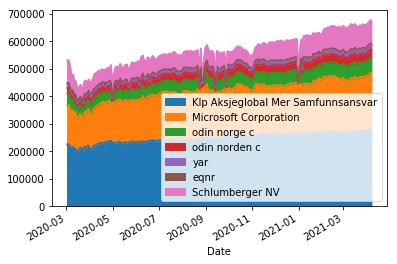

In [20]:
cm.plot.area()
plt.show()